**Ejercicios Planteados**

Clasificación de Clientes según su personalidad.

Luego de haber cerrado su cápsula de aprendizaje de clasificación, se le ha determinado que averigüe los intereses que pueden tener los clientes de la empresa KEPPLER, esto es necesario, para que se entregue la información al departamento de marketing y puedan realizar campañas fidelizada a sus clientes.

En el archivo clientes.cvs encontrará el registro de cada uno de ellos, además el archivo contiene 9 categorías -actividades laborales- que son:

● Actor/actriz

● Cantante

● Modelo

● Tv, series

● Radio

● Tecnología

● Deportes

● Política

● Escritor

In [2]:
#importar libreria
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#crear ruta led archivo clientes.csv
ruta_clientes = 'clientes.csv'

#leer archivo csv
data = pd.read_csv(ruta_clientes)

#mostrar los primeros 5 registros
print(data.head())

           usuario         op         co         ex         ag         ne  \
0     3gerardpique  34.297953  28.148819  41.948819  29.370315   9.841575   
1  aguerosergiokun  44.986842  20.525865  37.938947  24.279098  10.362406   
2   albertochicote  41.733854  13.745417  38.999896  34.645521   8.836979   
3    AlejandroSanz  40.377154  15.377462  52.337538  31.082154   5.032231   
4   alfredocasero1  36.664677  19.642258  48.530806  31.138871   7.305968   

   wordcount  categoria  
0    37.0945          7  
1    78.7970          7  
2    49.2604          4  
3    80.4538          2  
4    47.0645          4  


### 1. Realice un resumen estadístico de sus datos.

In [3]:
# Realizar un resumen estadístico de los datos
statistical_summary = data.describe()

# Mostrar el resumen estadístico
print(statistical_summary)

               op          co          ex          ag          ne   wordcount  \
count  140.000000  140.000000  140.000000  140.000000  140.000000  140.000000   
mean    44.414591   22.977135   40.764428   22.918528    8.000098   98.715484   
std      8.425723    5.816851    7.185246    7.657122    3.039248   44.714071   
min     30.020465    7.852756   18.693542    9.305985    1.030213    5.020800   
25%     38.206484   19.740299   36.095722   17.050993    6.086144   66.218475   
50%     44.507091   22.466718   41.457492   21.384554    7.839722   94.711400   
75%     49.365923   26.091606   45.197769   28.678866    9.758189  119.707925   
max     71.696129   49.637863   59.824844   40.583162   23.978462  217.183200   

        categoria  
count  140.000000  
mean     4.050000  
std      2.658839  
min      1.000000  
25%      2.000000  
50%      3.500000  
75%      7.000000  
max      9.000000  


### 2. Entregue gráficos que acompañen los hallazgos encontrados en el punto 1.

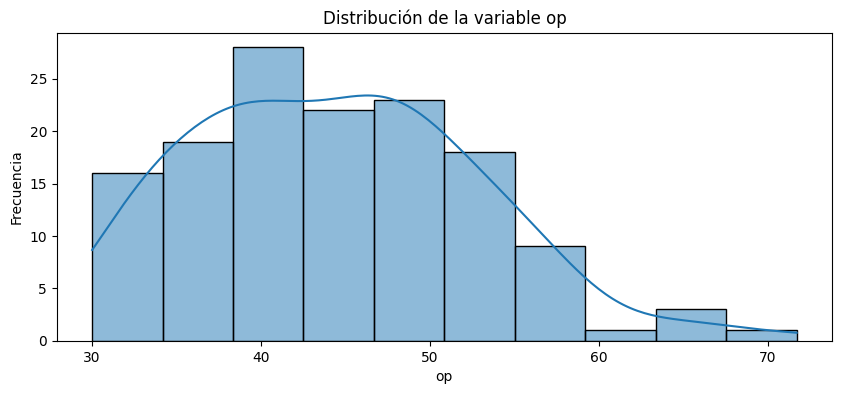

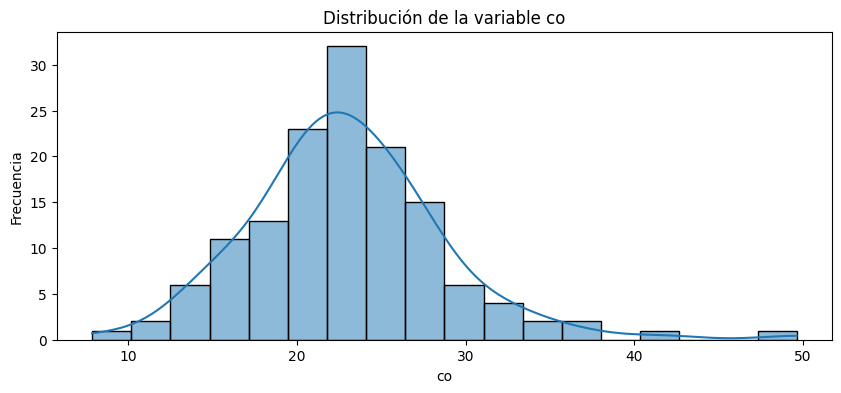

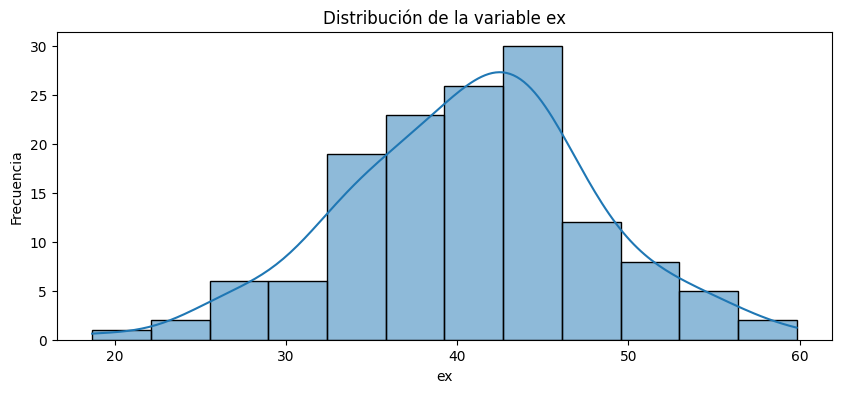

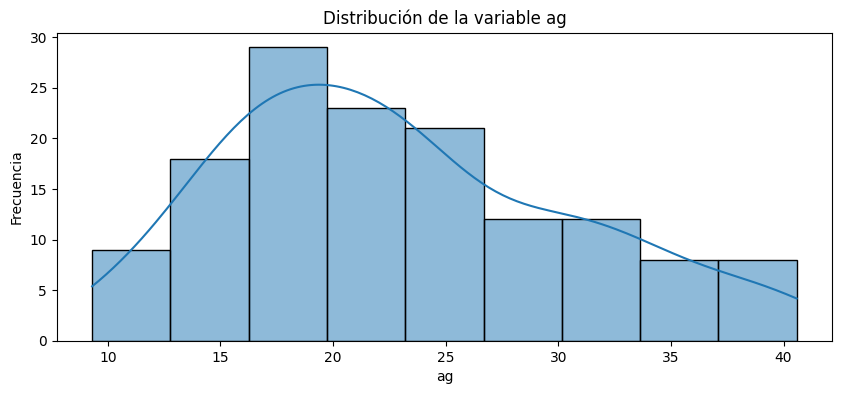

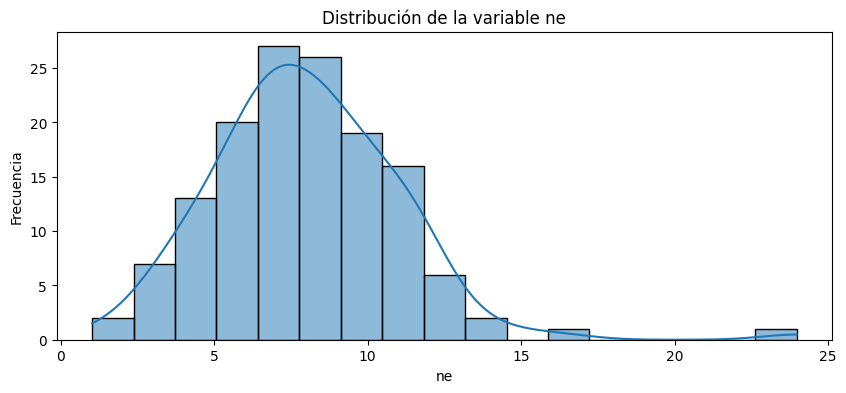

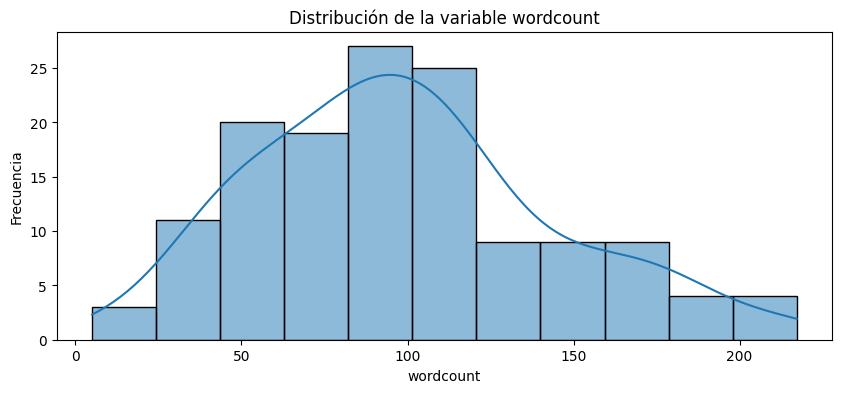

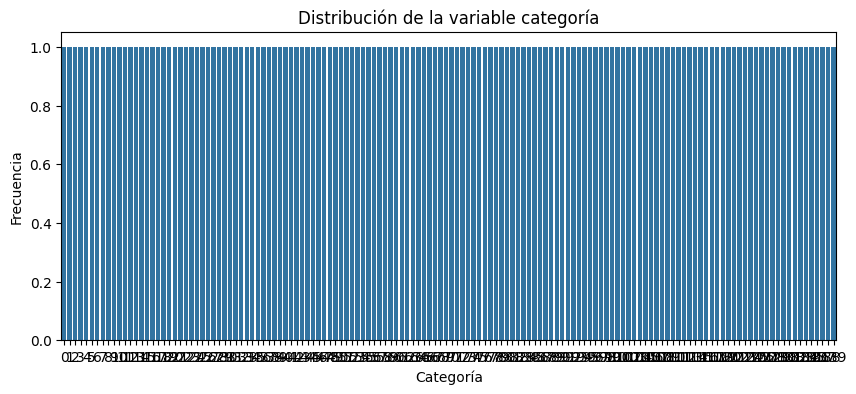

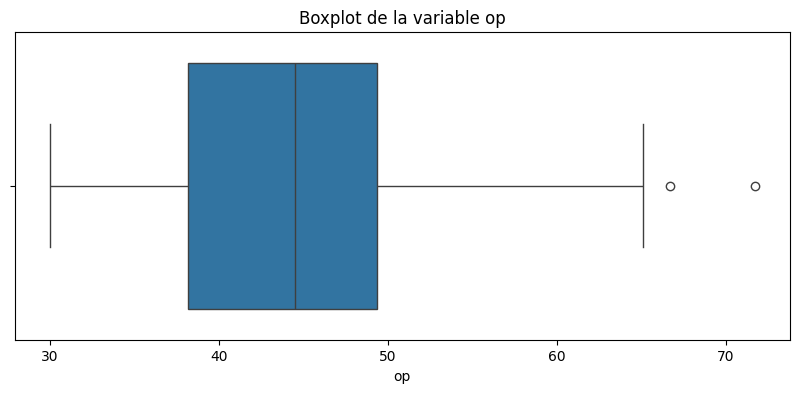

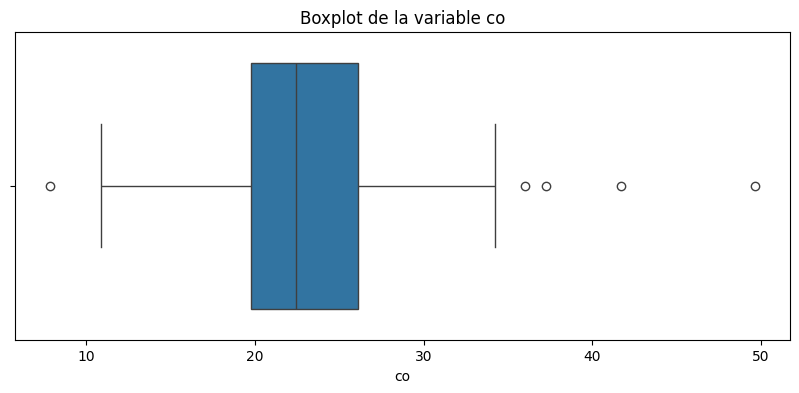

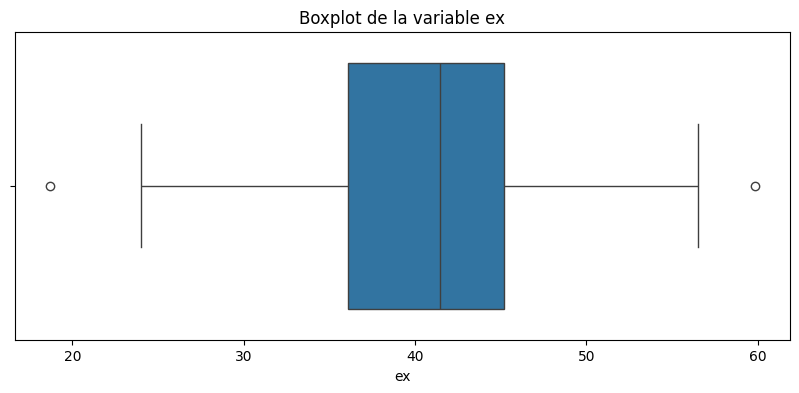

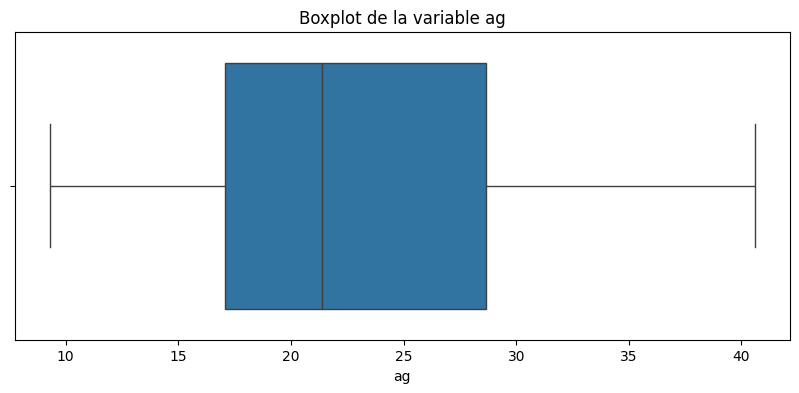

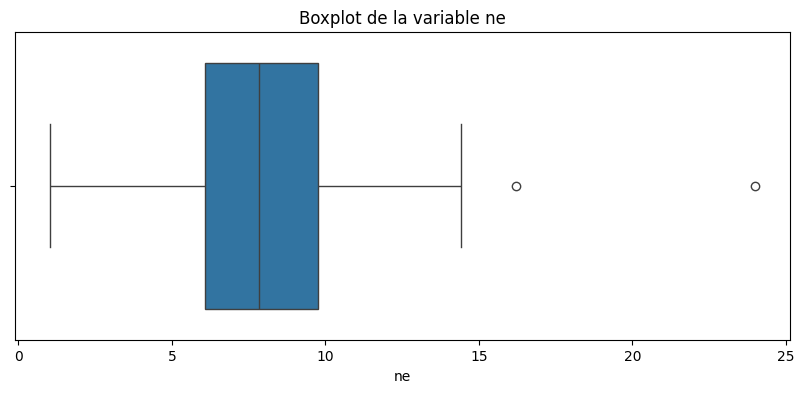

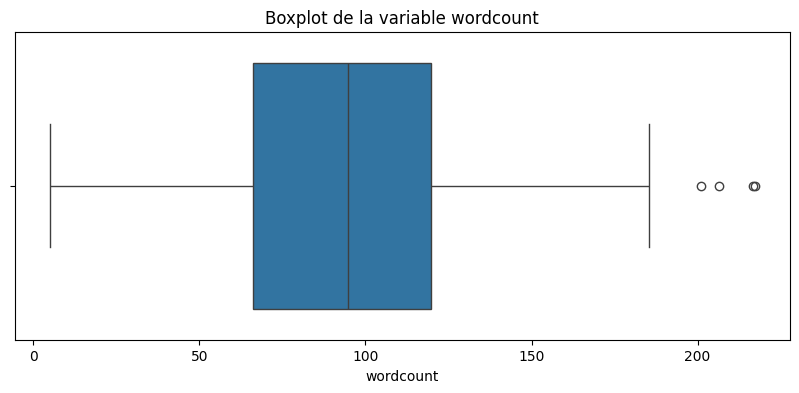

In [4]:
# Crear gráficos para visualizar la distribución de las variables
# Histogramas para cada variable numérica
variables_numericas = ['op', 'co', 'ex', 'ag', 'ne', 'wordcount']
for variable in variables_numericas:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[variable], kde=True)
    plt.title(f'Distribución de la variable {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.show()

# Crear un gráfico de barras para la variable categórica 'categoria'
plt.figure(figsize=(10, 4))
sns.countplot(data['categoria'])
plt.title('Distribución de la variable categoría')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

# Crear gráficos de cajas para visualizar la distribución y detectar outliers
for variable in variables_numericas:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[variable])
    plt.title(f'Boxplot de la variable {variable}')
    plt.xlabel(variable)
    plt.show()

### 3. Encuentre una relación o grafique las variables: op, ex y ag, además de las categorías.

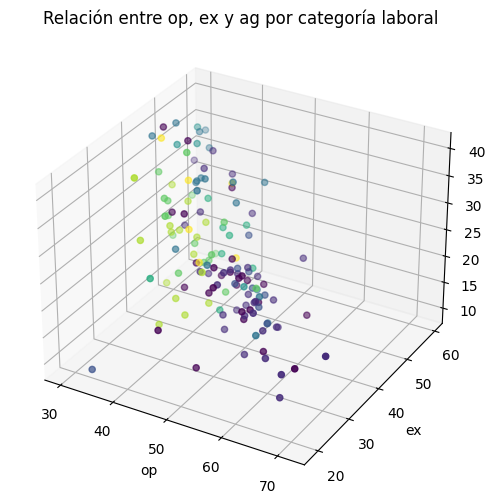

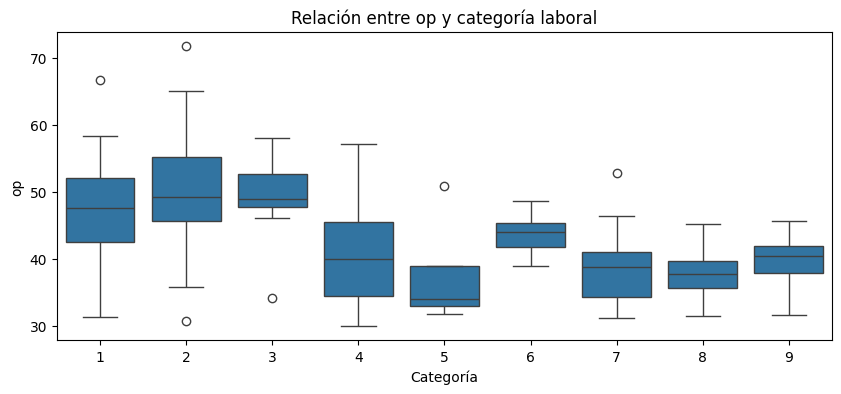

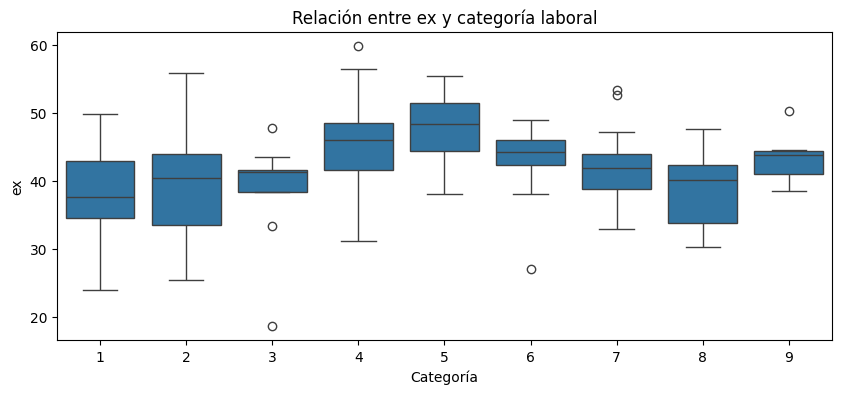

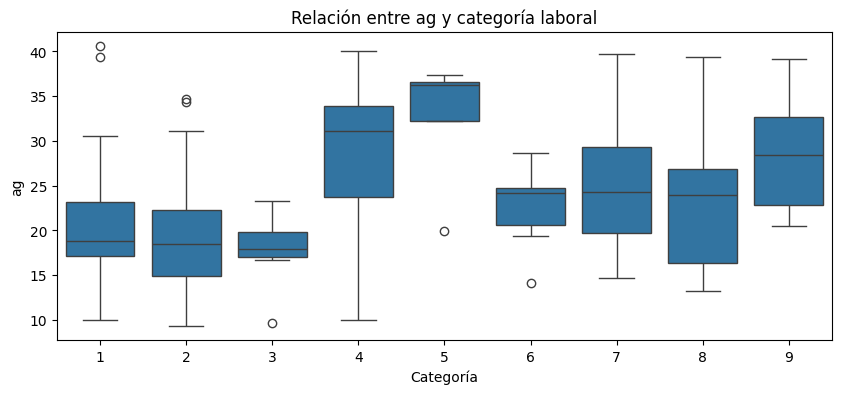

In [5]:
# Gráfico de dispersión tridimensional entre 'op', 'ex' y 'ag'
plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.scatter(data['op'], data['ex'], data['ag'], c=data['categoria'], cmap='viridis')
ax.set_xlabel('op')
ax.set_ylabel('ex')
ax.set_zlabel('ag')
plt.title('Relación entre op, ex y ag por categoría laboral')
plt.show()

# Gráficos de cajas para 'op', 'ex' y 'ag' con respecto a las categorías laborales
variables_numericas = ['op', 'ex', 'ag']
for variable in variables_numericas:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='categoria', y=variable, data=data)
    plt.title(f'Relación entre {variable} y categoría laboral')
    plt.xlabel('Categoría')
    plt.ylabel(variable)
    plt.show()

### 4. Determine cuántos k o clúster son adecuados para esta consulta.

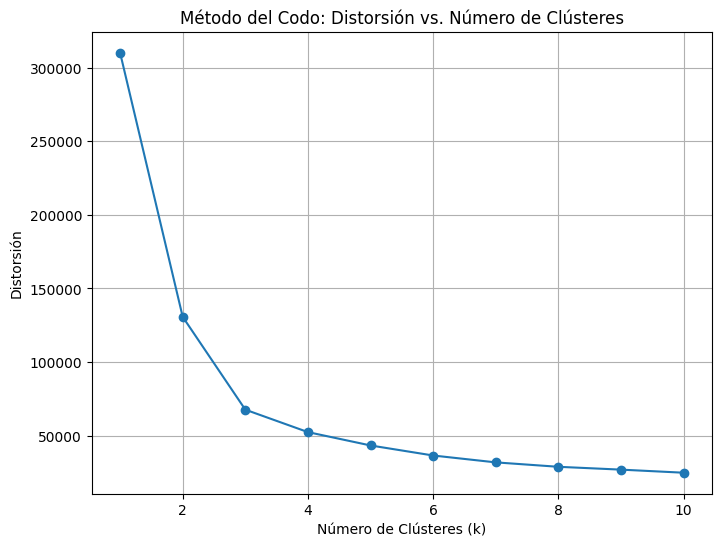

El número óptimo de clústeres es 3


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Supongamos que 'data' es tu DataFrame con los datos

# Codificar características categóricas usando one-hot encoding
data_encoded = pd.get_dummies(data)

# Calcular la distorsión para diferentes valores de k
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10)  # Establecer n_init explícitamente
    kmeans.fit(data_encoded)
    distortions.append(kmeans.inertia_)

# Calcular el punto de codo (número óptimo de clústeres)
diff = np.diff(distortions)
diff_r = diff[1:] / diff[:-1]
k_opt = K[np.argmin(diff_r)+1]

# Graficar la curva de distorsión (Elbow Method)
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, marker='o')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Distorsión')
plt.title('Método del Codo: Distorsión vs. Número de Clústeres')
plt.grid()
plt.show()

print(f"El número óptimo de clústeres es {k_opt}")


### 5. Realice un modelo de kmeans con los cluster definidos en el punto 4.

In [7]:
import pandas as pd
from sklearn.cluster import KMeans

# Seleccionar las variables relevantes para la clusterización
X = data[['op', 'ex', 'ag']]

# Número óptimo de clústeres (asumimos que es 3)
optimal_k = 3

# Implementar el algoritmo K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data['cluster'] = kmeans.fit_predict(X)

# Asignar cada cliente a un clúster específico
print(data[['categoria', 'cluster']].head(20))


    categoria  cluster
0           7        1
1           7        0
2           4        1
3           2        1
4           4        1
5           7        1
6           7        1
7           5        1
8           7        0
9           7        1
10          3        0
11          1        0
12          1        2
13          2        0
14          8        0
15          3        0
16          4        1
17          6        0
18          2        0
19          4        1


### 6. Entregue una representación gráfica de los cluster.

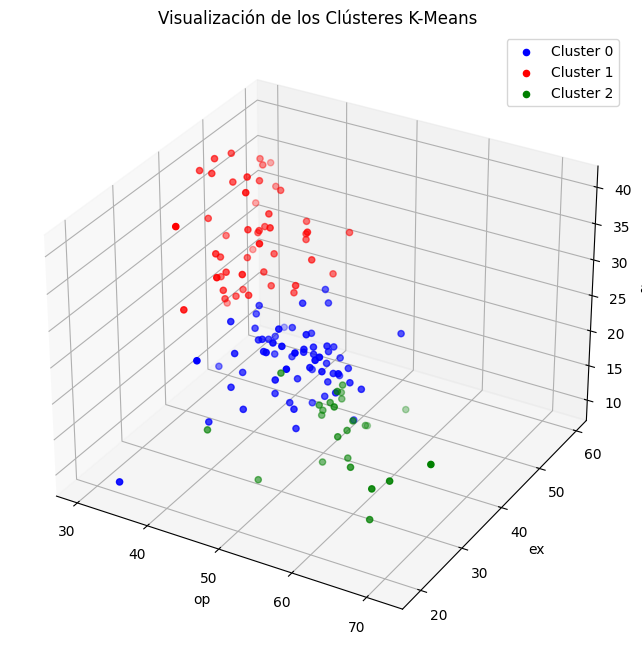

In [8]:
# Crear un gráfico 3D para visualizar los clústeres
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['blue', 'red', 'green', 'yellow']

for cluster, color in zip(range(optimal_k), colors):
    cluster_data = data[data['cluster'] == cluster]
    ax.scatter(cluster_data['op'], cluster_data['ex'], cluster_data['ag'], c=color, label=f'Cluster {cluster}')

ax.set_xlabel('op')
ax.set_ylabel('ex')
ax.set_zlabel('ag')
plt.title('Visualización de los Clústeres K-Means')
plt.legend()
plt.show()

### 7. A qué conclusión llega y cuál es su recomendación como experto.

El código utiliza el algoritmo K-Means para agrupar los datos en clústeres en función de las variables seleccionadas 'op', 'ex' y 'ag'. Luego, visualiza estos clústeres en un gráfico tridimensional.

Resultados del clustering:

Se asume que la cantidad óptima de clústeres es 3 (optimal_k = 3).
El algoritmo K-Means agrupa los datos en tres clústeres distintos basados en las características de apertura ('op'), extraversión ('ex') y amabilidad ('ag').
Cada clúster representa un grupo de observaciones que comparten características similares en estas tres dimensiones. Los clústeres pueden ser interpretados como grupos de individuos con perfiles psicológicos similares en términos de apertura, extraversión y amabilidad.
Análisis de la visualización:

En el gráfico tridimensional, cada punto representa una observación en el espacio definido por las variables 'op', 'ex' y 'ag'.
Los puntos están coloreados de acuerdo con el clúster al que pertenecen. Se utilizan cuatro colores ('blue', 'red', 'green' y 'yellow') para representar hasta cuatro clústeres diferentes.
Cada clúster está identificado en la leyenda del gráfico, lo que facilita la interpretación de los puntos y su asociación con los diferentes grupos.
Interpretación:

La visualización tridimensional permite identificar la distribución de los clústeres en el espacio definido por las tres variables seleccionadas.
Se pueden observar patrones de agrupamiento y separación entre los puntos, lo que indica la efectividad del algoritmo K-Means para identificar estructuras subyacentes en los datos.
Los clústeres pueden ser interpretados y analizados en función de sus características distintivas en términos de apertura, extraversión y amabilidad, lo que puede proporcionar información valiosa sobre los diferentes perfiles de personalidad presentes en los datos.
En resumen, el análisis de los resultados del clustering y la visualización tridimensional permiten comprender la estructura de los datos y obtener información sobre los grupos identificados por el algoritmo K-Means en función de las características seleccionadas.